In [5]:
from random import random
random()   #[0,1)

0.8194286714112196

## 凯利公式

> f* = (bp-q)/b

* f*为现有资金应进行下次投注的比例
* b为投注可得的赔率
* p为获胜率
* q为落败率，即 1 - p


### 验证凯文凯利公式

有4中策略：
* 使用凯利公式进行赌博
* 最大化的将现有资金作为赌注，投出去
* 将现有资金平均分成3份，然后将其中一份作为赌注投出去。
* 随意的将现有的资金投注出去
初始化资金 10000

每个人有20轮机会，最后查看收益，如果有人中途现有资金为0，他将不在进入循环


实验100次，查看对比结果。





In [4]:
from random import random

def celie1(money,b,p):
    #f为要投注的钱
    f = (b*p-(1-p))/b
    #r随机值，是否是在获胜的概率里
    r = random()
    if r<p:
        return money*f*b+money
    else:
        return money - f
        
    
def celie2(money,b,p):
    r = random()
    if r<p:
        return money*b+money
    else:
        return 0

def celie3(money,b,p):
    r = random()
    f = money/3
    if r<p:
        return f*b+money
    else:
        return money - f

def celie4(money,b,p):
    r = random()
    f = money*random()
    if r<p:
        return f*b+money
    else:
        return money - f
    

    
def kaili():
    listMan = [
        {
            'id':0,
            'money':10000
        },
        {
            'id':1,
            'money':10000
        },
        {
            'id':2,
            'money':10000
        },
        {
            'id':3,
            'money':10000
        }
    ]
    for i,value in enumerate(range(100)):
        #b为投注可得的赔率
        b = random()*2 #[随机的赔率是从0-2]
        #p为获胜率
        p = random()
        
        
        listMan[0]['money'] =  celie1(listMan[0]['money'],b,p)
        listMan[1]['money'] =  celie2(listMan[1]['money'],b,p)
        listMan[2]['money'] =  celie3(listMan[2]['money'],b,p)
        listMan[3]['money'] =  celie4(listMan[3]['money'],b,p)
    return listMan


results = {
    'm1':0,
    'm2':0,
    'm3':0,
    'm4':0
}
for i in range(100):
#    results.append(kaili())
    results['m1'] += kaili()[0]['money']
    results['m2'] += kaili()[1]['money']
    results['m3'] += kaili()[2]['money']
    results['m4'] += kaili()[3]['money']

print('m1:' ,results['m1']/100)
print('m2:' ,results['m2']/100)
print('m3:' ,results['m3']/100)
print('m4:' ,results['m4']/100)


        



m1: 548727593.1696204
m2: 0.0
m3: 1405.012469853535
m4: 0.003314420404994371


### 凯里公式
* 重写策略

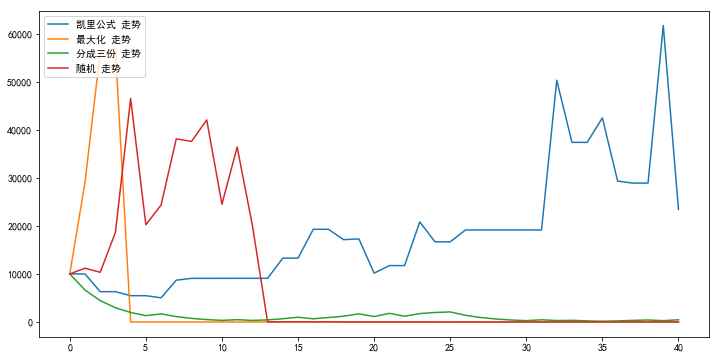

In [54]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

def celie1(money,b,p):
    #f为要投注的钱
    f = (b*p-(1-p))/b
    #r随机值，是否是在获胜的概率里
    r = random()
    if r<p:
        return money*f*b+money
    else:
        return money - f
        
    
def celie2(money,b,p):
    r = random()
    if r<p:
        return money*b+money
    else:
        return 0

def celie3(money,b,p):
    r = random()
    f = money/3
    if r<p:
        return f*b+money
    else:
        return money - f

def celie4(money,b,p):
    r = random()
    f = money*random()
    if r<p:
        return f*b+money
    else:
        return money - f
    

    
def kaili():
    listMan = [
        {
            'id':0,
            'money':[10000],
            'celue':'凯里公式'
        },
        {
            'id':1,
            'money':[10000],
            'celue':'最大化'
        },
        {
            'id':2,
            'money':[10000],
            'celue':'分成三份'
        },
        {
            'id':3,
            'money':[10000],
            'celue':'随机'
        }
    ]
    for i in range(40):
        #b为投注可得的赔率
        b = random()*2 #[随机的赔率是从0-2]
        #p为获胜率
        p = random()
        
        
        listMan[0]['money'].append(celie1(listMan[0]['money'][i],b,p))  
        listMan[1]['money'].append(celie2(listMan[1]['money'][i],b,p))  
        listMan[2]['money'].append(celie3(listMan[2]['money'][i],b,p))  
        listMan[3]['money'].append(celie4(listMan[3]['money'][i],b,p))  
    return listMan

plt.figure(figsize=(12,6))
for j in range(4):
    for i in range(100):
        x1 = kaili()[j]['money']
    plt.plot(x1,label='%s 走势'%kaili()[j]['celue'])

plt.legend(loc='upper left')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei显示中文
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示符号
plt.show()





In [43]:
# from random import random
# def kaili():
#     list=[
#         {'id':0,
#         'money':10000},
#         {'id':1,
#         'money':10000},
#         {'id':2,
#         'money':10000},
#         {'id':3,
#         'money':10000},
        
#     ]
#     b=random()*2
#     p=random()
#     for i in enumerate(range(100)):
        
        
        